Cel: Identyfikacja wzroców migracyjnych
* Wykrycie głównych kierunków migracji w UE na podstawie dostępnych danych (kraj pochodzenia → kraj docelowy, trendy czasowe)
* Analiza migracji wewnątrzunijnej oraz spoza UE
* Wykorzystane zestawy danych z Eurostatu:
    - Immigration by citizenship
    - Asylum applicants by type, citizenship, age and sex - monthly data
    - Population by citizenship 
    - All valid permits by reason, length of validity and citzenship on 31 December of each year

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Immigration by citizenship

Imigracja w tym zbiorze danych jest postrzegana jako zamieszaknie na terytorium państwa na okres wynoszący CO NAJMNIEJ 12 miesięcy. Dane wyłączają uchodźców z Ukrainy, korzystających z ochrony tymczasowej.

In [ ]:
df = pd.read_csv('../processed_data/immigration_by_citizenship.csv')

eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy",
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal",
    "Romania", "Slovakia", "Slovenia", "Spain", "Sweden", "United Kingdom"
]  # plus United Kingdom

eu_only = df[df["geo"].isin(eu_countries)]
#eu_only = eu_only[eu_only['Country of citizenship'] != eu_only['geo']]


### Analiza ogólnej liczby imgrantów do krajów UE

In [384]:
eu_only = eu_only[
    ~eu_only["geo"].str.contains("European Union|Total", case=False, na=False) &
    ~eu_only["Country of citizenship"].str.contains("Reporting country|Asia|America|Africa|Europe|Oceanian", case=False, na=False)
]


continents_pattern = "Asia|America|Africa|Europe|Oceanian"
filtered = eu_only[~eu_only["Country of citizenship"].str.contains(continents_pattern, case=False, na=False)]

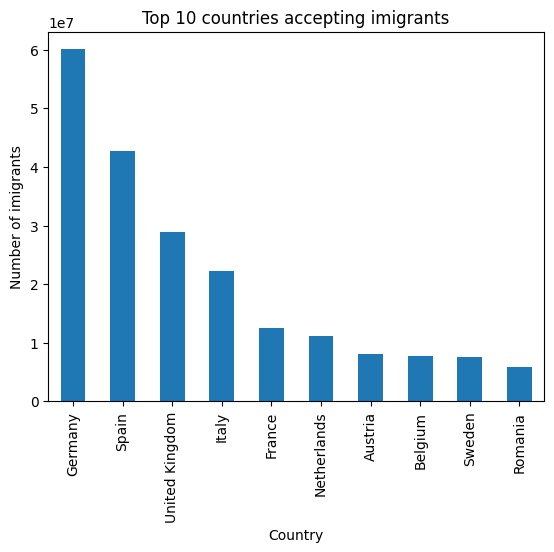

In [385]:
immigrants_by_country = filtered.groupby("geo")["Migrants number"].sum().sort_values(ascending=False)
immigrants_by_country.head(10).plot(kind='bar', title="Top 10 countries accepting imigrants")
plt.xlabel("Country")
plt.ylabel("Number of imigrants")
plt.show()


Najwięcej imigrantów przyjmują:
* NIEMCY
* HISZPANIA
* WIELKA BRYTANIA
* WŁOCHY
* HOLANDIA
* FRANCJA

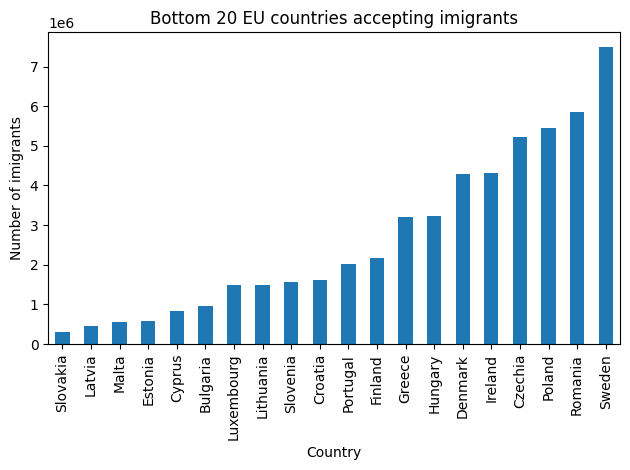

In [386]:
bottom15 = immigrants_by_country.sort_values().head(20)

bottom15.plot(kind='bar', title="Bottom 20 EU countries accepting imigrants")
plt.xlabel("Country")
plt.ylabel("Number of imigrants")
plt.tight_layout()
plt.show()

### Analiza według obywatelstwa (kraj pochodzenia)

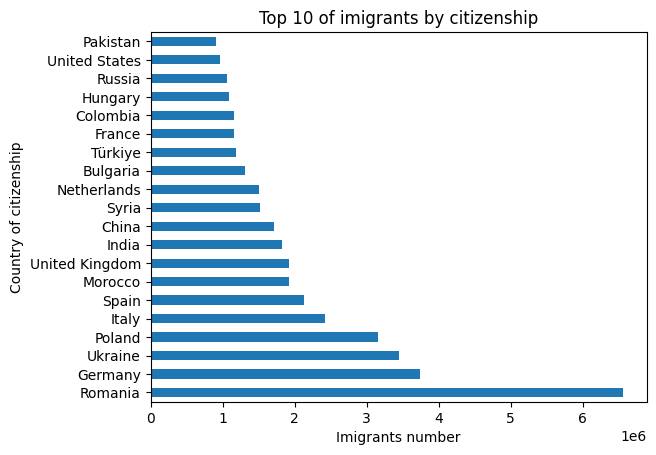

In [393]:
filtered_interest = filtered[~filtered["Country of citizenship"].str.contains("Reporting country|Foreign country|except|EU|Total|Stateless", case=False, na=False)]
top_origins = filtered_interest.groupby("Country of citizenship")["Migrants number"].sum().sort_values(ascending=False)

top_origins.head(20).plot(kind='barh', title="Top 10 of imigrants by citizenship")
plt.xlabel("Imigrants number")
plt.show()


### Macierze migracji: skąd -> dokąd

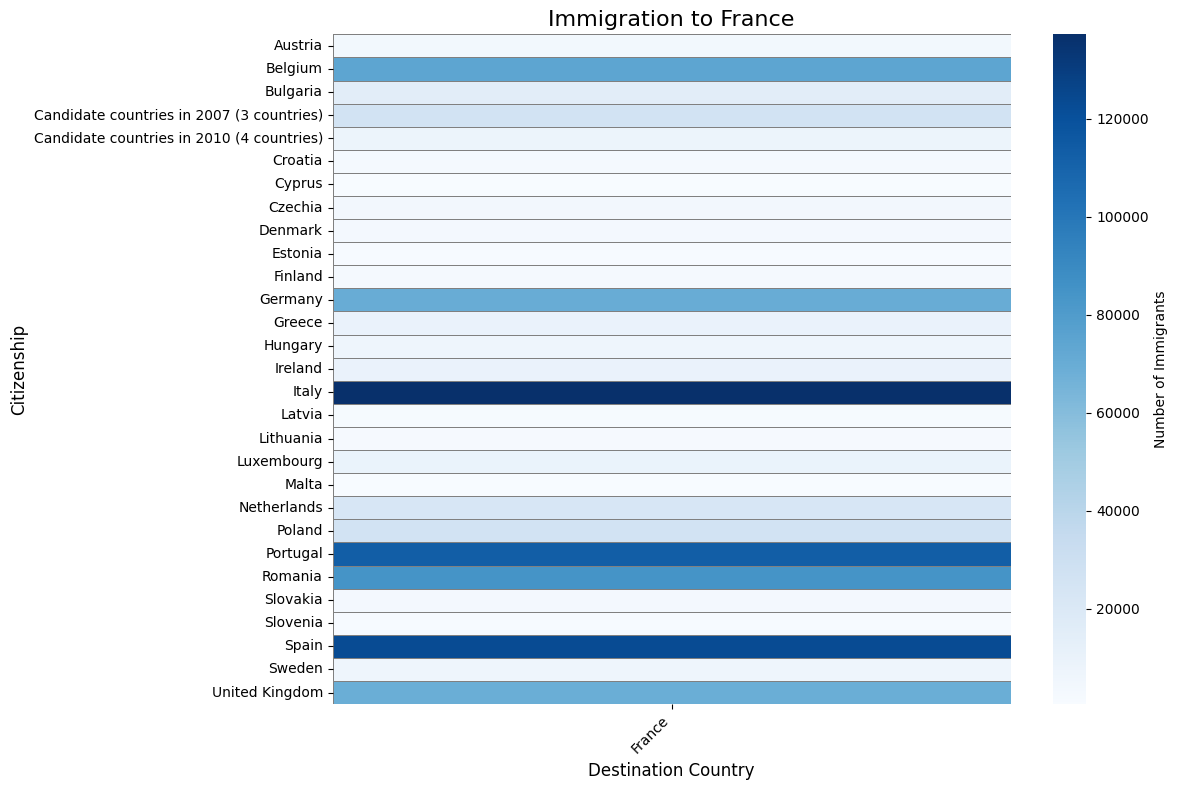

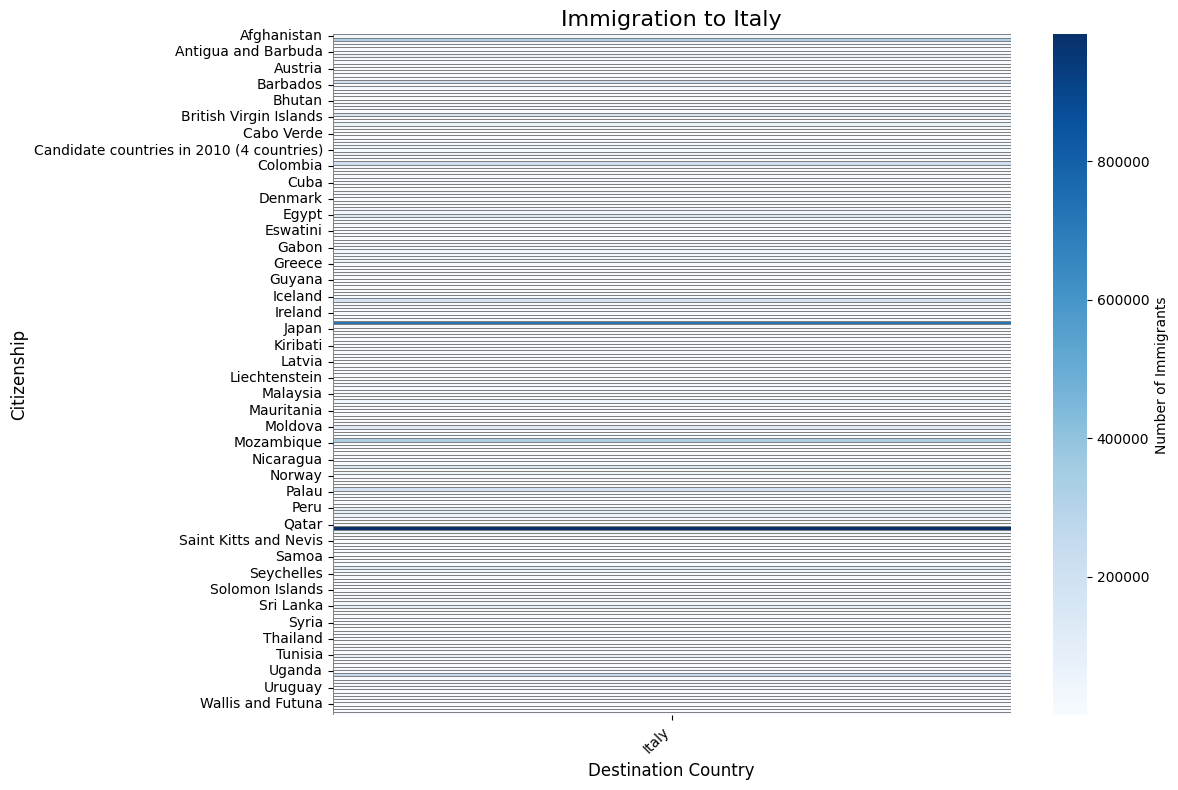

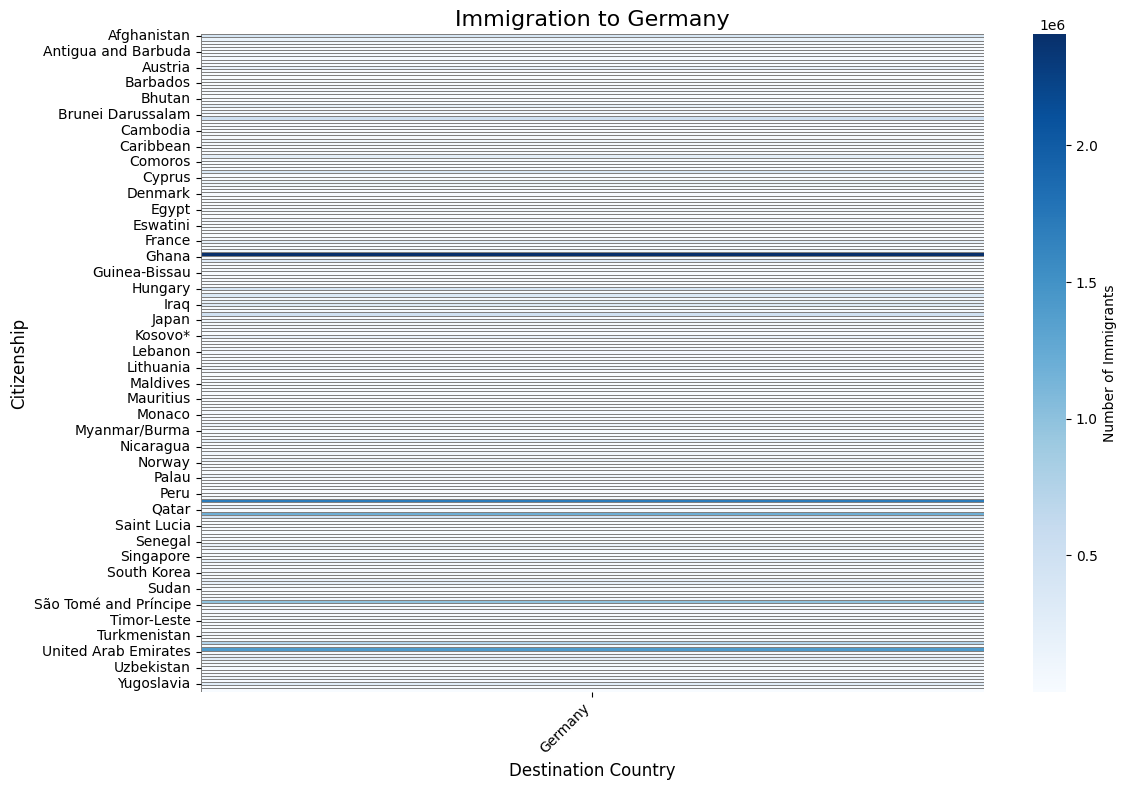

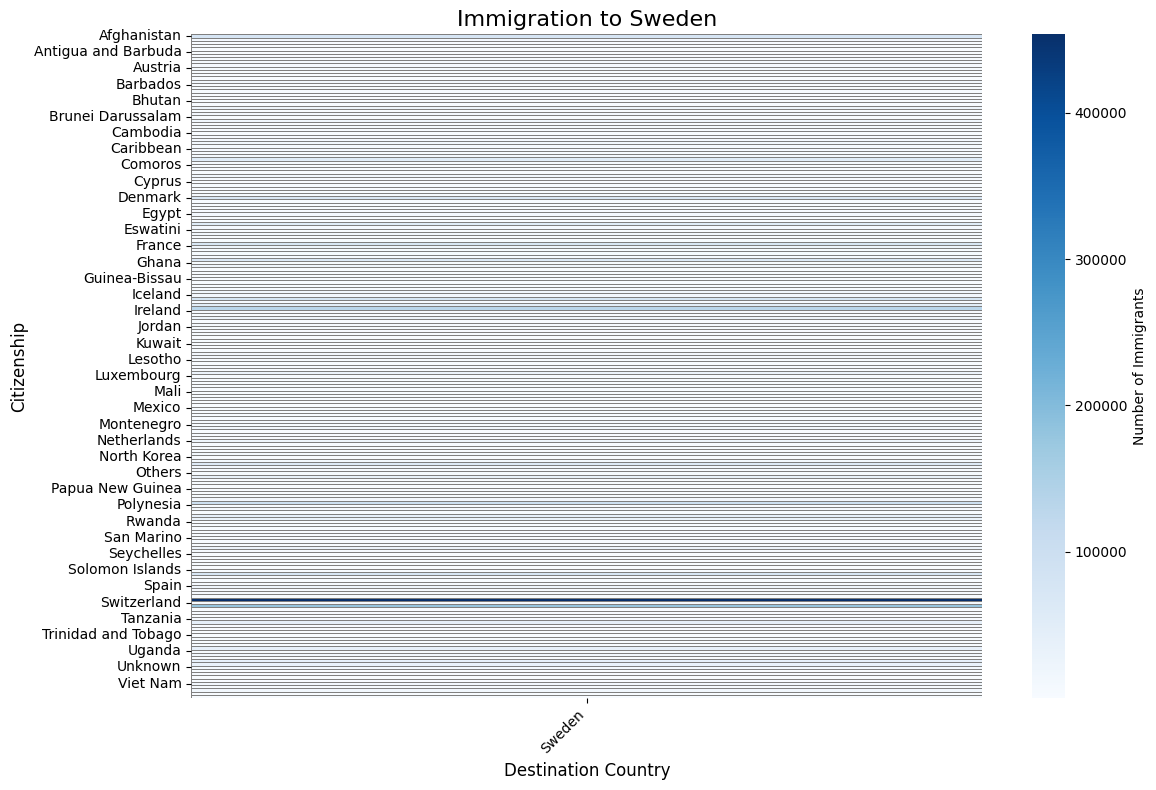

In [394]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden']
filtered_interest = filtered[~filtered["Country of citizenship"].str.contains("Reporting country|Foreign country|except|EU|Total|Stateless", case=False, na=False)]
filtered_interest = filtered_interest[filtered_interest["geo"].isin(countries_of_interest)]

pivot_table = filtered_interest.pivot_table(
    index="Country of citizenship",
    columns="geo",
    values="Migrants number",
    aggfunc="sum"
)

for country in countries_of_interest:
    country_data = pivot_table[[country]].fillna(0)
    
    country_data = country_data[country_data[country] > 0]

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        country_data, 
        cmap="Blues", 
        linewidths=0.5, 
        linecolor="gray", 
        cbar_kws={'label': 'Number of Immigrants'}
    )
    
    plt.title(f"Immigration to {country}", fontsize=16)
    plt.xlabel("Destination Country", fontsize=12)
    plt.ylabel("Citizenship", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Gdzie migrują Polacy?

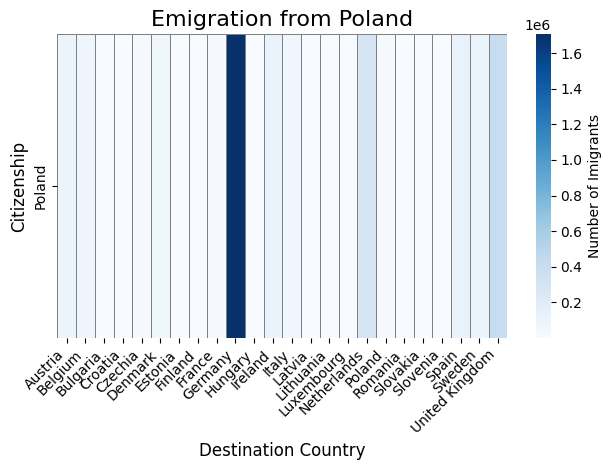

In [395]:
filtered_interest = filtered[filtered["Country of citizenship"] == "Poland"]

pivot_table = filtered_interest.pivot_table(
    index="Country of citizenship",
    columns="geo",
    values="Migrants number",
    aggfunc="sum"
)

sns.heatmap(
    pivot_table, 
    cmap="Blues", 
    linewidths=0.5, 
    linecolor="gray", 
    cbar_kws={'label': 'Number of Imigrants'}
)

plt.title(f"Emigration from Poland", fontsize=16)
plt.xlabel("Destination Country", fontsize=12)
plt.ylabel(f"Citizenship", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

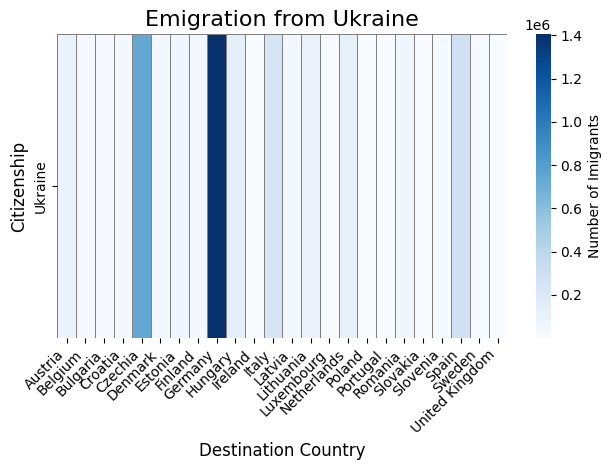

In [369]:
filtered_interest = filtered[filtered["Country of citizenship"] == "Ukraine"]

pivot_table = filtered_interest.pivot_table(
    index="Country of citizenship",
    columns="geo",
    values="Migrants number",
    aggfunc="sum"
)

sns.heatmap(
    pivot_table, 
    cmap="Blues", 
    linewidths=0.5, 
    linecolor="gray", 
    cbar_kws={'label': 'Number of Imigrants'}
)

plt.title(f"Emigration from Ukraine", fontsize=16)
plt.xlabel("Destination Country", fontsize=12)
plt.ylabel(f"Citizenship", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Trendy czasowe w migracji dla wybranych krajów

Dla całego świata

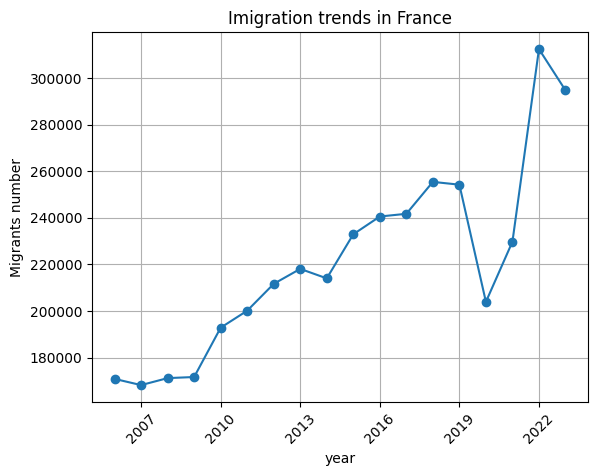

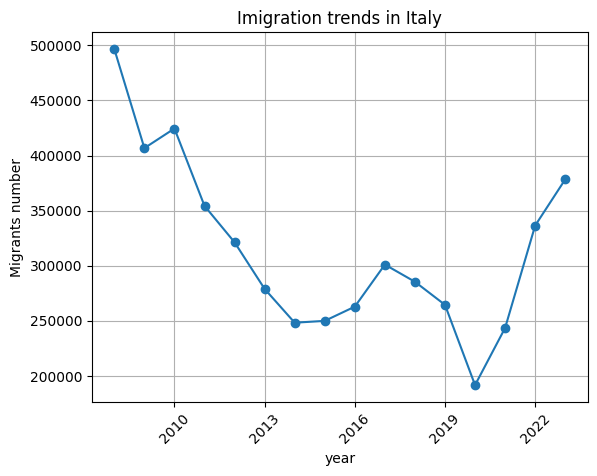

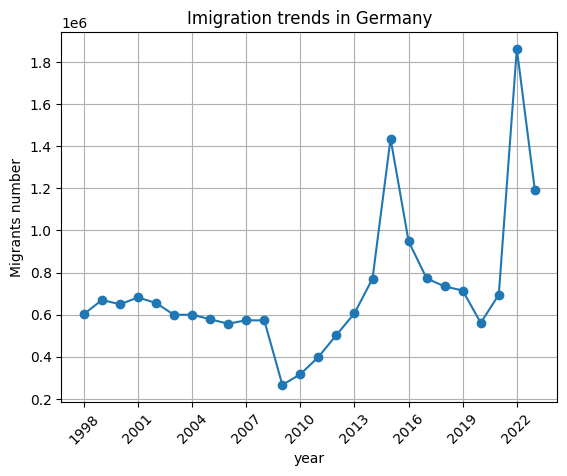

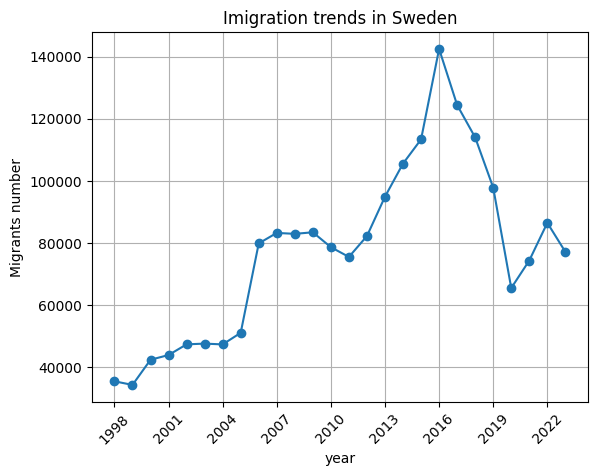

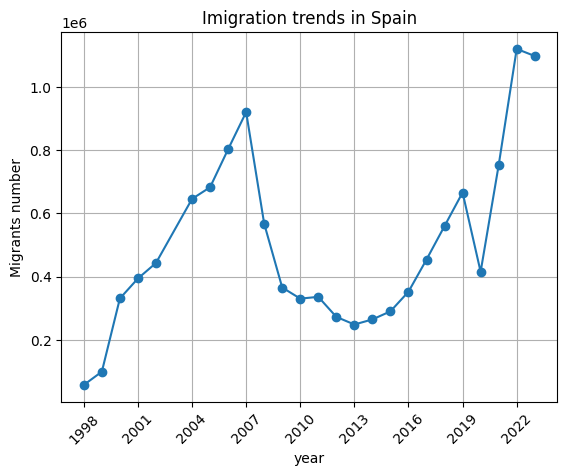

In [370]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden', 'Spain']

filtered_interest = filtered[(filtered["geo"].isin(countries_of_interest)) & (filtered["Country of citizenship"] == "Foreign country and stateless")]

for country in countries_of_interest:

    trend = filtered_interest[filtered_interest["geo"] == country].groupby("year")["Migrants number"].sum()

   
    trend.plot(title=f"Imigration trends in {country}", marker='o')
    plt.ylabel("Migrants number")
    
    
    years = sorted(trend.index.unique())
    ticks_every_3 = [year for year in years if year % 3 == 0]
    plt.xticks(ticks_every_3, rotation=45)
    
  
    plt.grid(True)
    

    plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_25040\249683899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_interest["from_EU"] = filtered_interest["Country of citizenship"].isin(eu_countries)


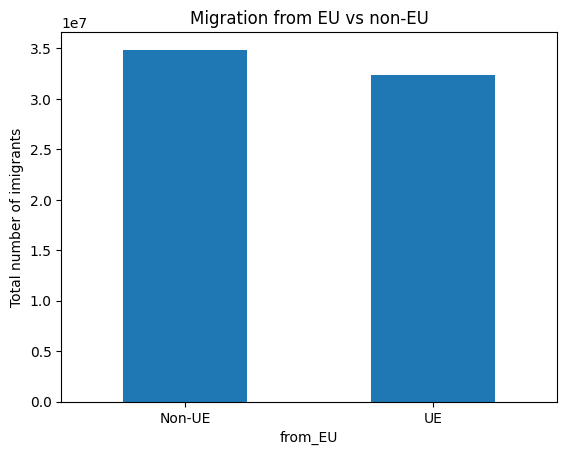

In [396]:
filtered_interest = filtered[~filtered["Country of citizenship"].str.contains("Reporting country|Foreign country|except|EU|Total|Stateless", case=False, na=False)]
filtered_interest["from_EU"] = filtered_interest["Country of citizenship"].isin(eu_countries)

filtered_interest.groupby("from_EU")["Migrants number"].sum().plot(kind='bar', title="Migration from EU vs non-EU")
plt.xticks([0, 1], ['Non-UE', 'UE'], rotation=0)
plt.ylabel("Total number of imigrants")
plt.show()

C:\Users\natal\AppData\Local\Temp\ipykernel_25040\1351838953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_interest["from_EU"] = filtered_interest["Country of citizenship"].isin(eu_countries)


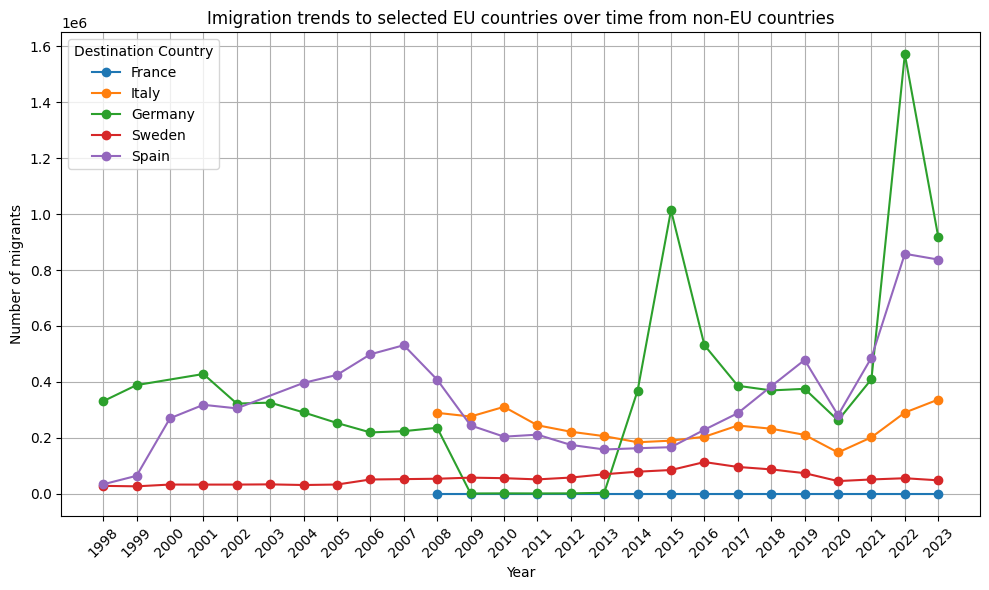

In [372]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden', 'Spain']

filtered_interest = filtered[
    ~filtered["Country of citizenship"].str.contains("Reporting country|Foreign country|except|EU|Total|candidate", case=False, na=False)
]

filtered_interest["from_EU"] = filtered_interest["Country of citizenship"].isin(eu_countries)

filtered_interest = filtered_interest[(filtered_interest["geo"].isin(countries_of_interest)) & ~(filtered_interest["from_EU"])]

plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    trend = (
        filtered_interest[filtered_interest["geo"] == country]
        .groupby("year")["Migrants number"]
        .sum()
    )
    plt.plot(trend.index, trend.values, marker='o', label=country)


plt.title("Imigration trends to selected EU countries over time from non-EU countries")
plt.xlabel("Year")
plt.ylabel("Number of migrants")
plt.xticks(sorted(filtered_interest["year"].unique()), rotation=45)
plt.grid(True)
plt.legend(title="Destination Country")
plt.tight_layout()


plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_25040\2993350355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_interest["from_EU"] = filtered_interest["Country of citizenship"].isin(eu_countries)


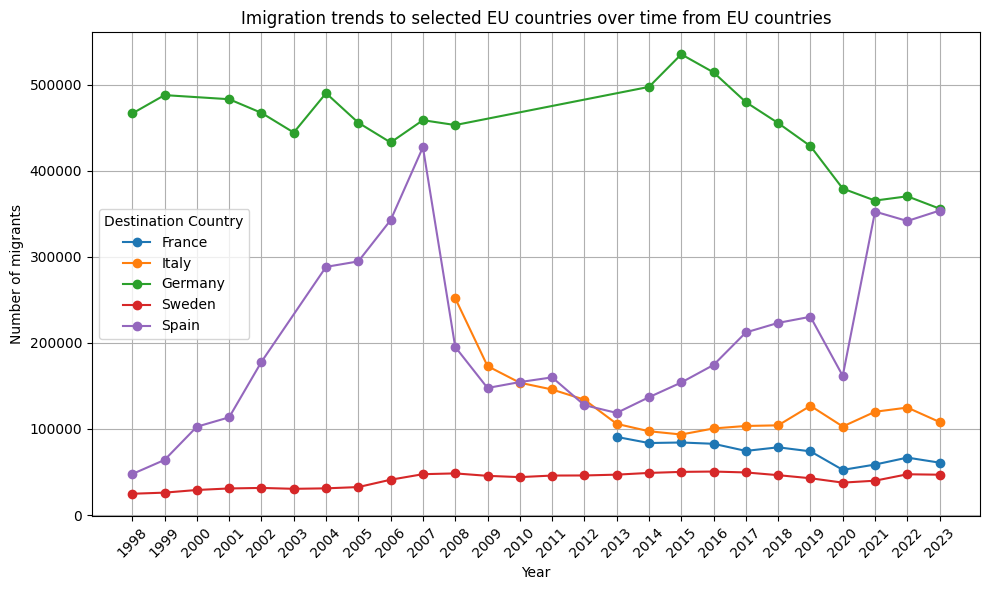

In [397]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden', 'Spain']


filtered_interest = filtered[~filtered["Country of citizenship"].str.contains("Reporting country|Foreign country|except|EU|Total|Stateless", case=False, na=False)]

filtered_interest["from_EU"] = filtered_interest["Country of citizenship"].isin(eu_countries)

filtered_interest = filtered_interest[(filtered_interest["geo"].isin(countries_of_interest)) & (filtered_interest["from_EU"])]

plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    trend = (
        filtered_interest[filtered_interest["geo"] == country]
        .groupby("year")["Migrants number"]
        .sum()
    )
    plt.plot(trend.index, trend.values, marker='o', label=country)


plt.title("Imigration trends to selected EU countries over time from EU countries")
plt.xlabel("Year")
plt.ylabel("Number of migrants")
plt.xticks(sorted(filtered_interest["year"].unique()), rotation=45)
plt.grid(True)
plt.legend(title="Destination Country")
plt.tight_layout()


plt.show()



Analiza migracji w czasie dla Polski

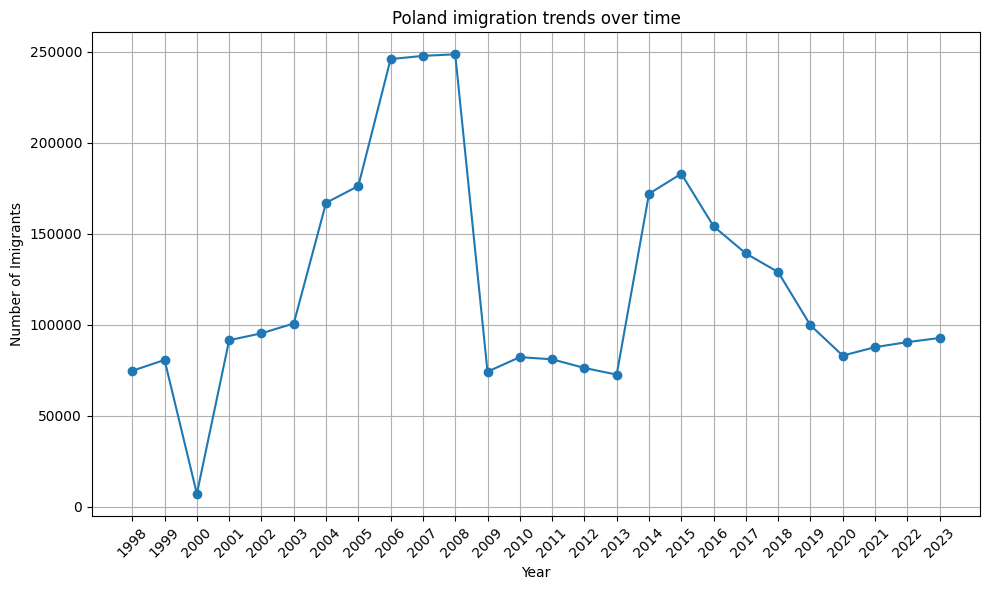

In [459]:
filtered_interest = filtered[filtered["Country of citizenship"] == "Poland"]

plt.figure(figsize=(10, 6))


trend = (
    filtered_interest
    .groupby("year")["Migrants number"]
    .sum()
)
plt.plot(trend.index, trend.values, marker='o', label=country)

plt.title("Poland imigration trends over time")
plt.xlabel("Year")
plt.ylabel("Number of Imigrants")
plt.xticks(sorted(filtered_interest["year"].unique()), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

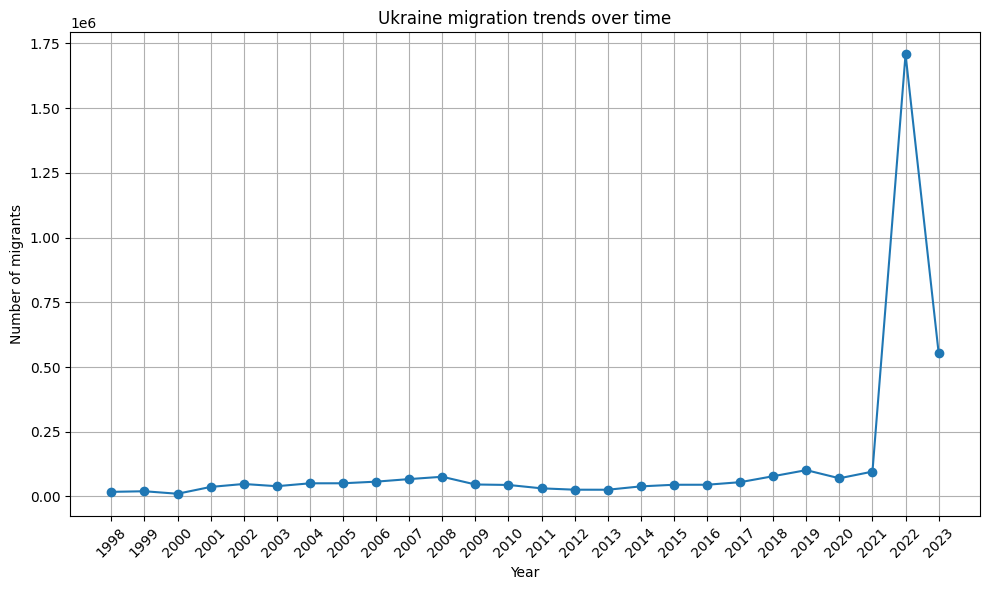

In [399]:
filtered_interest = filtered[filtered["Country of citizenship"] == "Ukraine"]

plt.figure(figsize=(10, 6))


trend = (
    filtered_interest
    .groupby("year")["Migrants number"]
    .sum()
)
plt.plot(trend.index, trend.values, marker='o', label=country)

plt.title("Ukraine migration trends over time")
plt.xlabel("Year")
plt.ylabel("Number of migrants")
plt.xticks(sorted(filtered_interest["year"].unique()), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# All valid permits by reason, length of validity and citzenship on 31 December of each year

Zawiera szczegółowe informacje na temat ważnych pozwoleń na pobyt wydanych cudzoziemcom w krajach UE i EFTA na koniec każdego roku. Zbiór nie bierze pod uwagę uchodźców wojennych.

In [11]:
all_valid_permits = pd.read_csv('../processed_data/migrants_all_valid_permits.csv')

all_valid_permits = all_valid_permits[~all_valid_permits["geo"].str.contains("European", case=False, na=False)]


In [12]:
all_valid_permits.head()

,Country of citizenship,geo,Migrants number,year,Population,Migrants number per 100k inhabitants
0,Andorra,Austria,1.0,2016,8700471,0.01
1,Andorra,Austria,2.0,2017,8772865,0.02
2,Andorra,Austria,2.0,2018,8822267,0.02
3,Andorra,Austria,2.0,2019,8858775,0.02
4,Andorra,Austria,2.0,2020,8901064,0.02


### Analiza wydanych pozwoleń w poszczególnych krajach

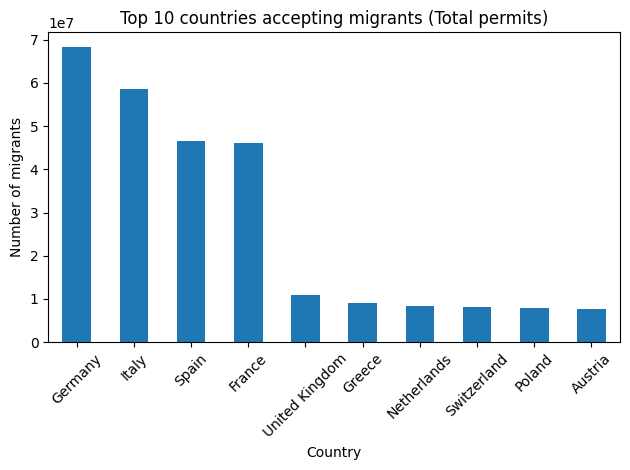

In [13]:
total_permits = all_valid_permits[all_valid_permits["Country of citizenship"] == "Total"]

top10 = total_permits.groupby("geo")["Migrants number"].sum().sort_values(ascending=False).head(10)

top10.plot(kind='bar', title="Top 10 countries accepting migrants (Total permits)")
plt.xlabel("Country")
plt.ylabel("Number of migrants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


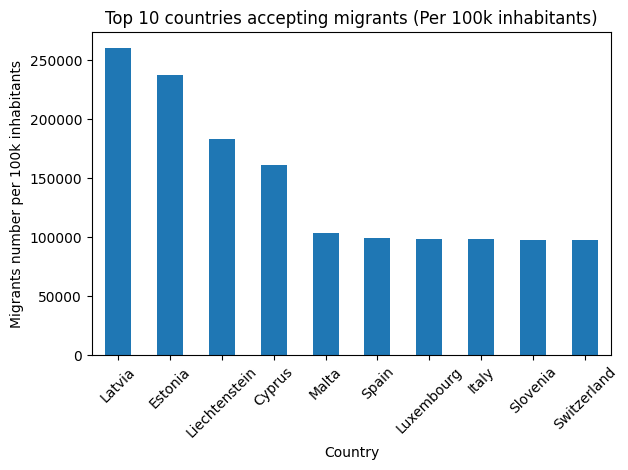

In [14]:
total_permits = all_valid_permits[all_valid_permits["Country of citizenship"] == "Total"]

top10 = total_permits.groupby("geo")["Migrants number per 100k inhabitants"].sum().sort_values(ascending=False).head(10)

top10.plot(kind='bar', title="Top 10 countries accepting migrants (Per 100k inhabitants)")
plt.xlabel("Country")
plt.ylabel("Migrants number per 100k inhabitants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


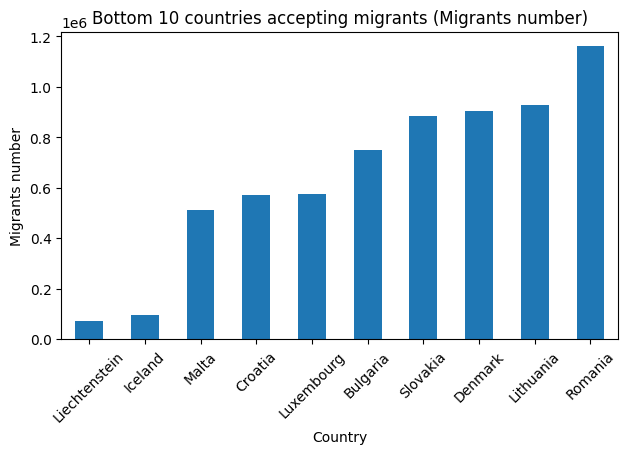

In [15]:
total_permits = all_valid_permits[all_valid_permits["Country of citizenship"] == "Total"]

bottom10 = total_permits.groupby("geo")["Migrants number"].sum().sort_values(ascending=True).head(10)

bottom10.plot(kind='bar', title="Bottom 10 countries accepting migrants (Migrants number)")
plt.xlabel("Country")
plt.ylabel("Migrants number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


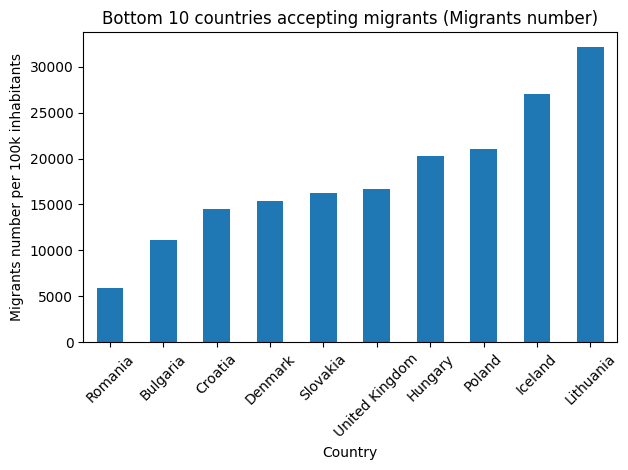

In [16]:
total_permits = all_valid_permits[all_valid_permits["Country of citizenship"] == "Total"]

bottom10 = total_permits.groupby("geo")["Migrants number per 100k inhabitants"].sum().sort_values(ascending=True).head(10)

bottom10.plot(kind='bar', title="Bottom 10 countries accepting migrants (Migrants number)")
plt.xlabel("Country")
plt.ylabel("Migrants number per 100k inhabitants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analiza wydanych pozwoleń (rozkład w czasie)

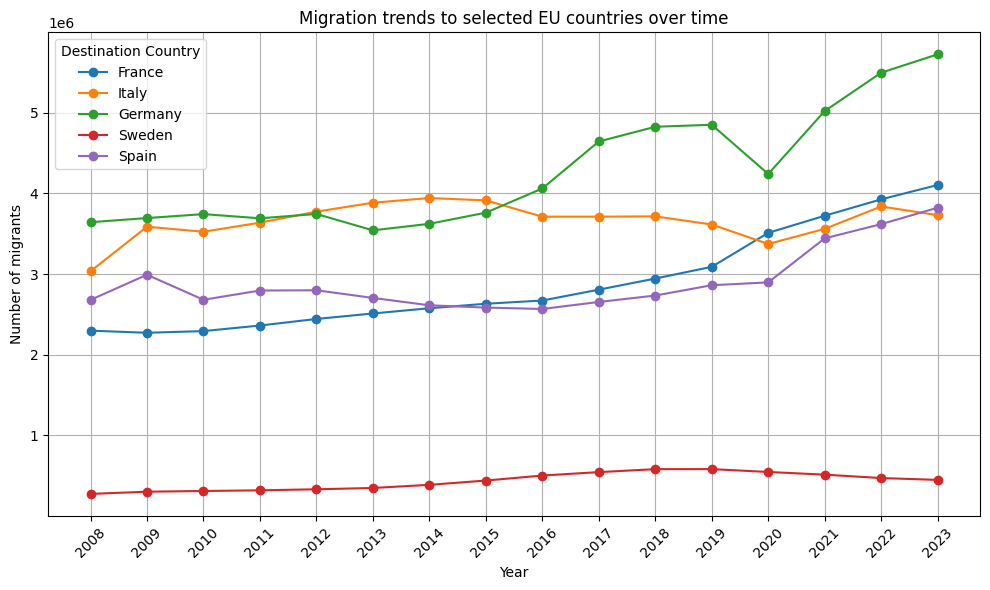

In [17]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden', 'Spain']

filtered_interest = all_valid_permits[
    (all_valid_permits["geo"].isin(countries_of_interest)) &
    (all_valid_permits["Country of citizenship"] == "Total")
]

plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    trend = filtered_interest[filtered_interest["geo"] == country]
    plt.plot(trend["year"], trend["Migrants number"], marker='o', label=country)

plt.title("Migration trends to selected EU countries over time")
plt.xlabel("Year")
plt.ylabel("Number of migrants")
plt.xticks(sorted(filtered_interest["year"].unique()), rotation=45)
plt.grid(True)
plt.legend(title="Destination Country")
plt.tight_layout()
plt.show()




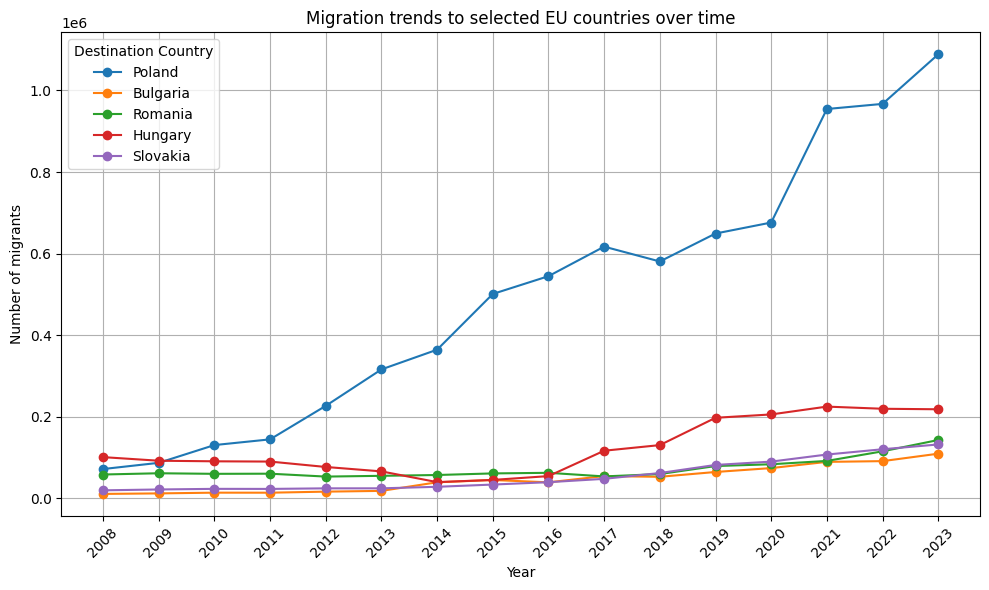

In [18]:
countries_of_interest = ['Poland', 'Bulgaria', 'Romania', 'Hungary', 'Slovakia']

filtered_interest = all_valid_permits[
    (all_valid_permits["geo"].isin(countries_of_interest)) &
    (all_valid_permits["Country of citizenship"] == "Total")
]

plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    trend = filtered_interest[filtered_interest["geo"] == country]
    plt.plot(trend["year"], trend["Migrants number"], marker='o', label=country)

plt.title("Migration trends to selected EU countries over time")
plt.xlabel("Year")
plt.ylabel("Number of migrants")
plt.xticks(sorted(filtered_interest["year"].unique()), rotation=45)
plt.grid(True)
plt.legend(title="Destination Country")
plt.tight_layout()
plt.show()


In [19]:
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden', 'United Kingdom'
]  # plus United Kingdom!!

In [20]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden', 'Spain']
filtered_interest = all_valid_permits[all_valid_permits["geo"].isin(countries_of_interest)]
non_eu_filtered = filtered_interest[~filtered_interest["Country of citizenship"].isin(eu_countries)]

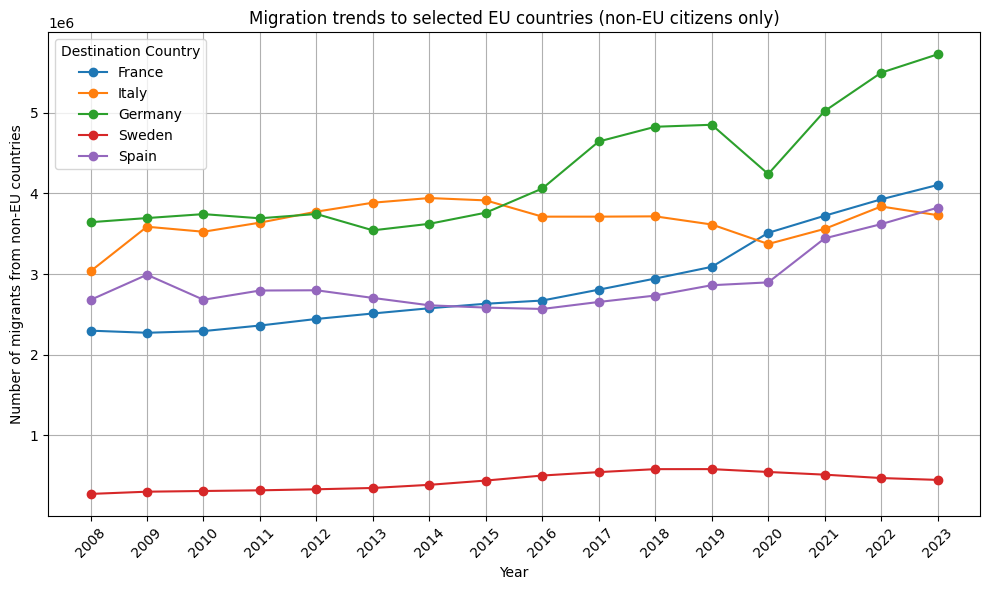

In [21]:
plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    trend = non_eu_filtered[
        (non_eu_filtered["geo"] == country) & 
        (non_eu_filtered["Country of citizenship"] == "Total")
    ]
    trend = trend.sort_values("year")
    plt.plot(trend["year"], trend["Migrants number"], marker='o', label=country)

plt.title("Migration trends to selected EU countries (non-EU citizens only)")
plt.xlabel("Year")
plt.ylabel("Number of migrants from non-EU countries")
plt.xticks(sorted(non_eu_filtered["year"].unique()), rotation=45)
plt.grid(True)
plt.legend(title="Destination Country")
plt.tight_layout()
plt.show()

### Sprawdzenie trendów dla Ukrainy

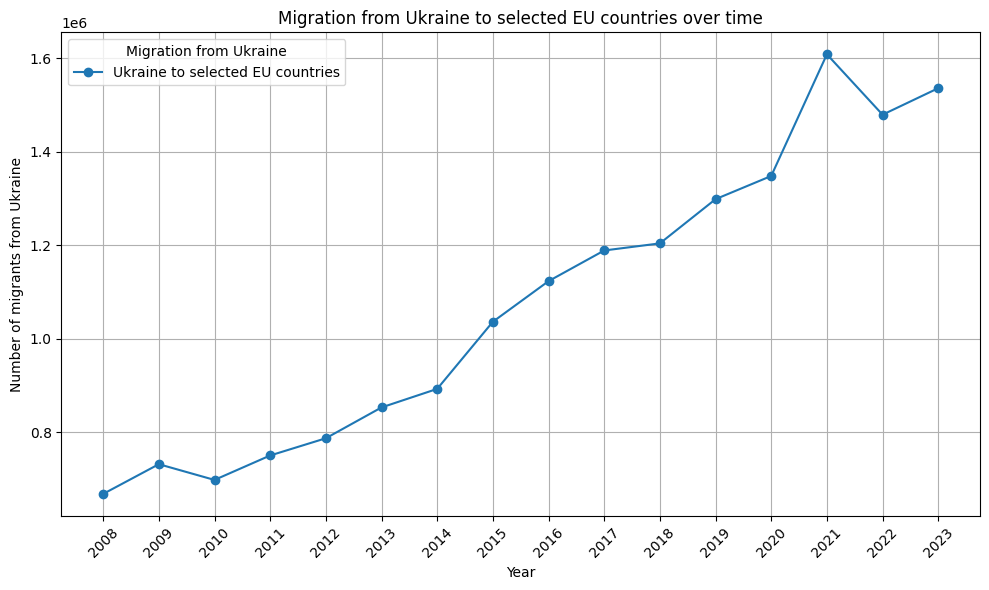

In [23]:
ukraine_migration = all_valid_permits[
    (all_valid_permits["Country of citizenship"] == "Ukraine")
]

ukraine_trends = ukraine_migration.groupby("year")["Migrants number"].sum()

plt.figure(figsize=(10, 6))
plt.plot(ukraine_trends.index, ukraine_trends.values, marker='o', label="Ukraine to selected EU countries")

plt.title("Migration from Ukraine to selected EU countries over time")
plt.xlabel("Year")
plt.ylabel("Number of migrants from Ukraine")
plt.xticks(sorted(ukraine_trends.index), rotation=45)
plt.grid(True)
plt.legend(title="Migration from Ukraine")
plt.tight_layout()
plt.show()


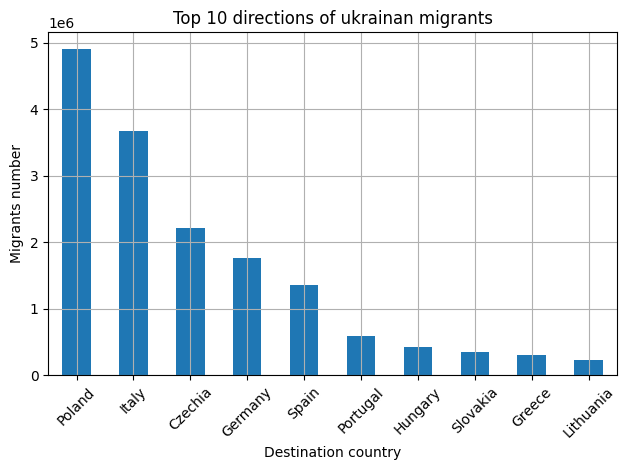

In [52]:
top_ukrain_dest = (
    ukraine_migration.groupby("geo")["Migrants number"]
    .sum()
    .sort_values(ascending=False)
)

top_ukrain_dest.head(10).plot(kind='bar', title="Top 10 directions of ukrainan migrants")
plt.xlabel("Destination country")
plt.ylabel("Migrants number")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Analiza kierunków,z których pochodzą migranci któym wydano zgody na pobyt

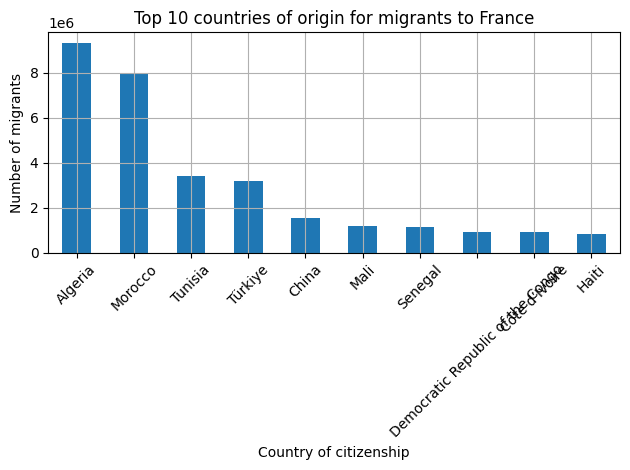

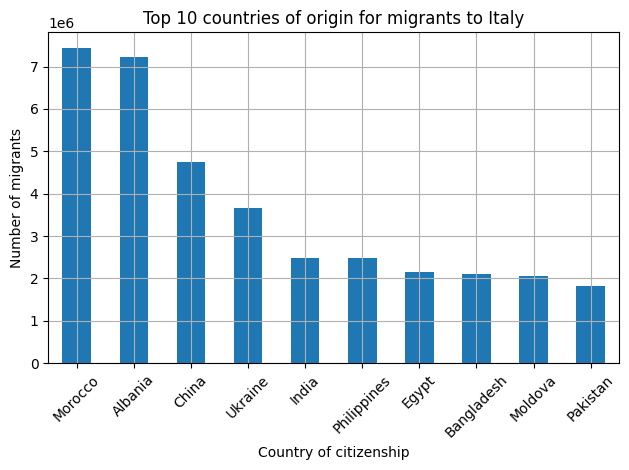

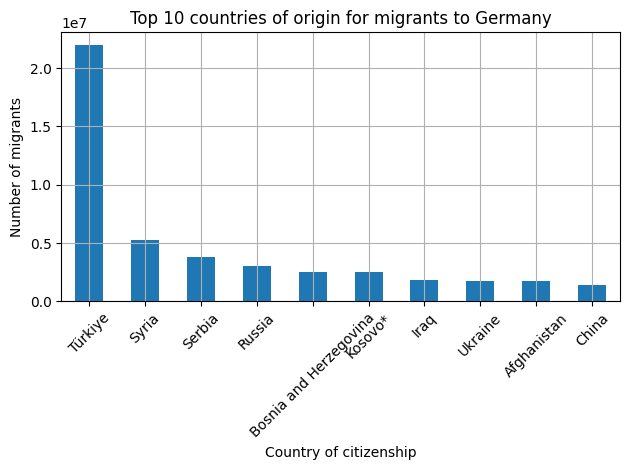

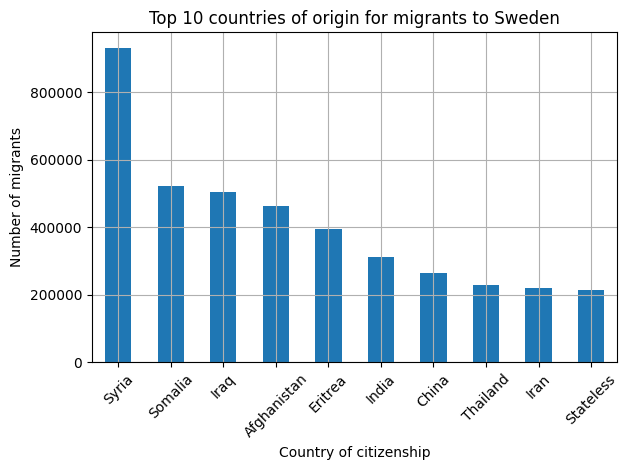

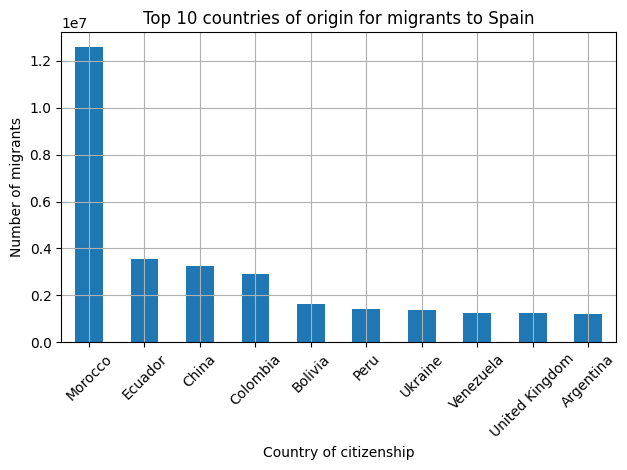

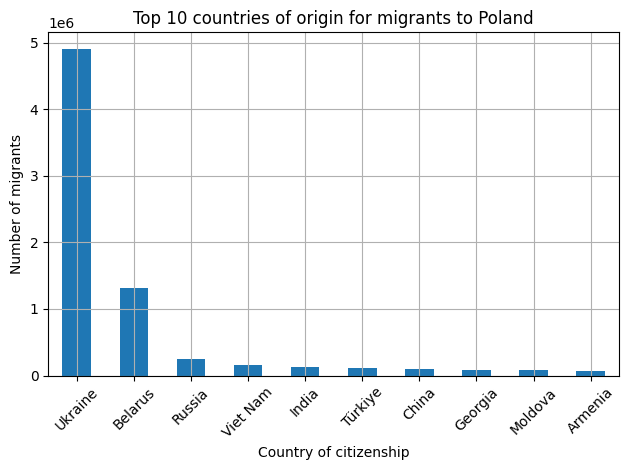

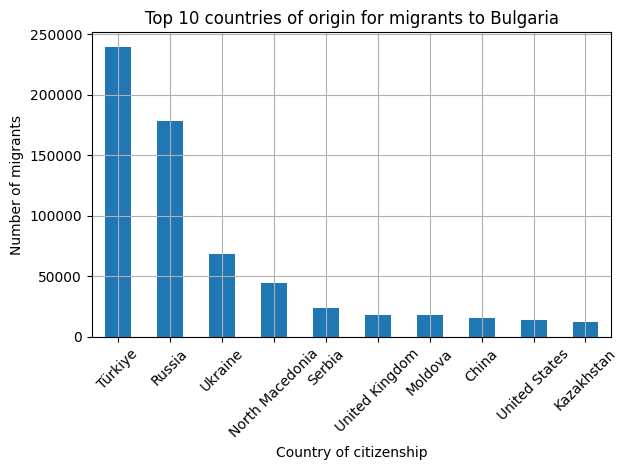

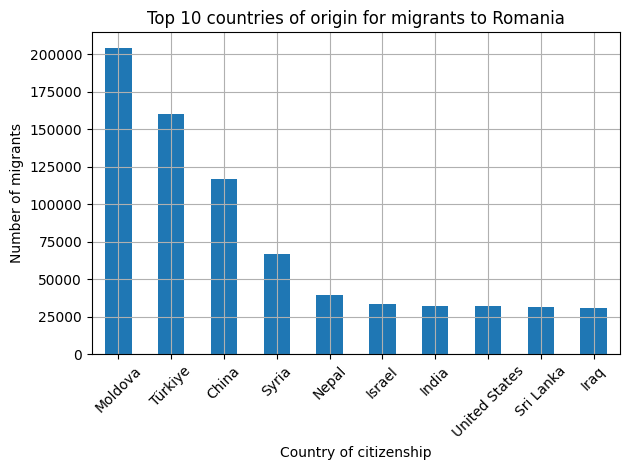

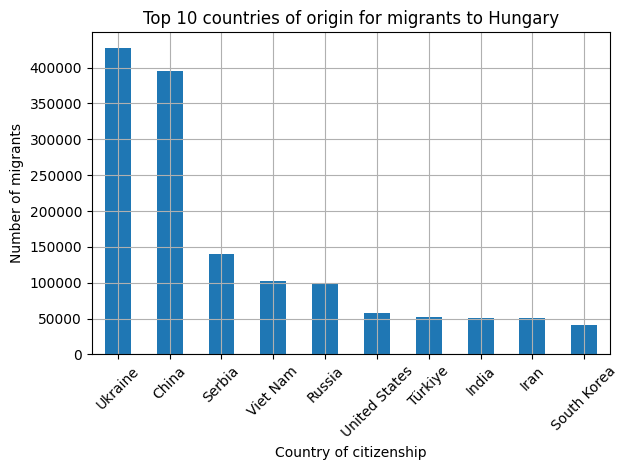

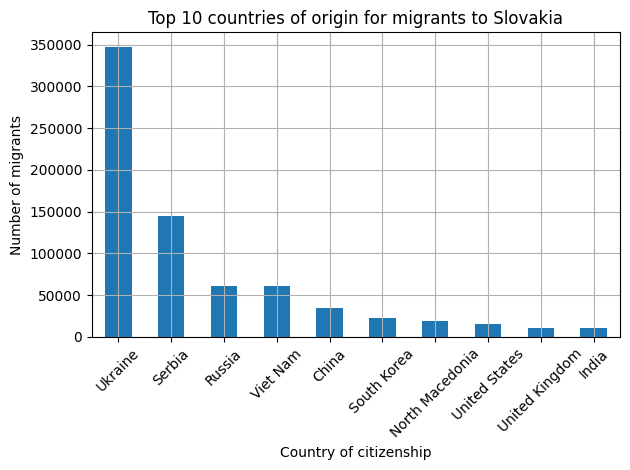

In [32]:
countries_of_interest = ['France', 'Italy', 'Germany', 'Sweden', 'Spain', 'Poland', 'Bulgaria', 'Romania', 'Hungary', 'Slovakia']


filtered = all_valid_permits[all_valid_permits["Country of citizenship"] != "Total"]

for country in countries_of_interest:

    country_data = filtered[filtered["geo"] == country]

    top_countries = (

        country_data.groupby("Country of citizenship")["Migrants number"]
        .sum()
        .sort_values(ascending=False)
        .head(10)  
    )


    top_countries.plot(kind='bar', title=f"Top 10 countries of origin for migrants to {country}")
    plt.xlabel("Country of citizenship")
    plt.ylabel("Number of migrants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


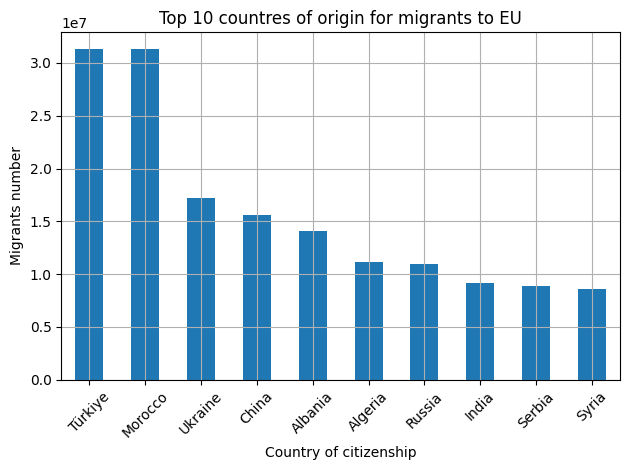

In [44]:
filtered = all_valid_permits[all_valid_permits["Country of citizenship"] != "Total"]

top_origin_countries = (
    filtered.groupby("Country of citizenship")["Migrants number"]
    .sum()
    .sort_values(ascending=False)
)

top_origin_countries.head(10).plot(kind='bar', title="Top 10 countres of origin for migrants to EU")
plt.xlabel("Country of citizenship")
plt.ylabel("Migrants number")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()